# Import Python Packages

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import RandomOverSampler, SMOTE



### Load Data

In [4]:
bk_data = pd.read_excel("Bankruptcy_data_Final.xlsx")
#Replace NAN with 0
bk_data = bk_data.fillna(0)
bk_data.head()

In [9]:
bk_data.dtypes

EPS                   float64
Liquidity             float64
Profitability         float64
Productivity          float64
Leverage Ratio        float64
Asset Turnover        float64
Operational Margin    float64
Return on Equity      float64
Market Book Ratio     float64
Assets Growth         float64
Sales Growth          float64
Employee Growth       float64
BK                      int64
dtype: object

In [10]:
bk_data.describe().T

,count,mean,std,min,25%,50%,75%,max
EPS,92872.0,-14.460577,2195.408189,-3.840000e+05,-0.140000,0.330000,1.530000,55339.00
Liquidity,92872.0,-2.624239,121.449170,-2.596852e+04,0.020000,0.190000,0.400000,1.00
Profitability,92872.0,-29.458717,676.331196,-7.968200e+04,-0.630000,0.070000,0.310000,140.58
Productivity,92872.0,-1.219618,35.837859,-5.093000e+03,-0.060000,0.060000,0.110000,1102.00
Leverage Ratio,92872.0,1.344940,253.002671,-7.811000e+03,0.000000,0.280000,0.820000,75970.38
Asset Turnover,92872.0,1.050811,2.113826,-3.159000e+01,0.380000,0.820000,1.380000,276.38
Operational Margin,92872.0,-7.441862,207.953408,-3.017570e+04,-0.020000,0.060000,0.130000,394.47
Return on Equity,92872.0,-2.112200,352.581716,-8.887514e+04,-0.080000,0.030000,0.070000,39500.00
Market Book Ratio,92872.0,358.286233,26055.639928,-3.151500e+06,11.160000,58.170000,240.015000,3455419.33
Assets Growth,92872.0,1.200704,71.059112,-1.000000e+00,-0.041112,0.037360,0.174523,14231.00


#### Add Altman Z Score to improve prediction

What is Altman Z Score: https://www.investopedia.com/terms/a/altman.asp

In [11]:
# Altman Z Score
bk_data['Altman Z Score'] = 1.2*bk_data['Liquidity'] + 1.4*bk_data['Profitability'] 
+ 3.3*bk_data['Productivity'] + 0.6/bk_data['Leverage Ratio'] + bk_data['Asset Turnover']

0        2.650128
1        2.444015
2        2.396524
3        2.404000
4        4.564000
           ...   
92867   -0.014247
92868   -0.316303
92869    0.787640
92870    1.243237
92871    0.609870
Length: 92872, dtype: float64

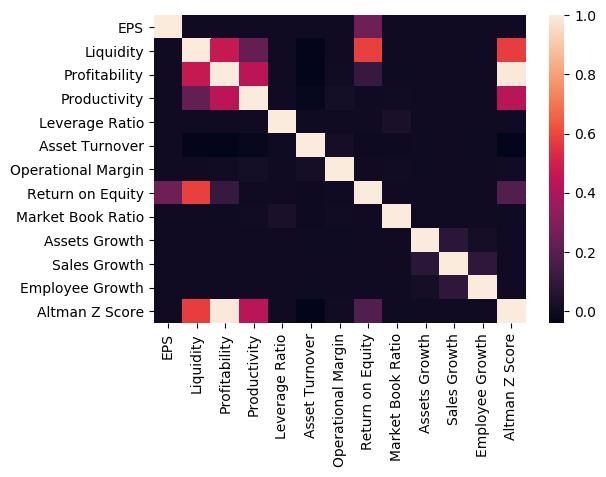

In [58]:
corr = bk_data.drop('BK',axis=1).corr()
plt.figure(figsize=(6,4))
sn.heatmap(corr)

### Train Test Split

In [59]:
X = bk_data.drop('BK', axis=1)
y = bk_data['BK']
X_train, X_test, y_train,  y_test = train_test_split(X, y, random_state=42)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(69654, 13)
(23218, 13)
(array([0, 1], dtype=int64), array([69235,   419], dtype=int64))
(array([0, 1], dtype=int64), array([23079,   139], dtype=int64))


### Baseline Random Forest before under/over Sampling

In [65]:
RF_Baseline = RandomForestClassifier(class_weight='balanced', random_state=42)
%time RF_Baseline.fit(X_train, y_train)
RF_Baseline_predict = RF_Baseline.predict(X_test)
print(classification_report(y_test, RF_Baseline_predict))
sn.heatmap(confusion_matrix(y_test,RF_Baseline_predict), cbar=False, annot=True, cmap='Wistia', fmt ='d',annot_kws={"size": 6})

Wall time: 8.15 s
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23079
           1       0.40      0.01      0.03       139

    accuracy                           0.99     23218
   macro avg       0.70      0.51      0.51     23218
weighted avg       0.99      0.99      0.99     23218



### Oversampling with imblearn and SMOTE

In [80]:
from imblearn.over_sampling import RandomOverSampler
#Oversampling
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
print(y_train_over.shape)
print(np.unique(y_train_over, return_counts=True))

(138470, 13)
(138470,)
(array([0, 1], dtype=int64), array([69235, 69235], dtype=int64))


Wall time: 17 s
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23079
           1       0.17      0.01      0.03       139

    accuracy                           0.99     23218
   macro avg       0.58      0.51      0.51     23218
weighted avg       0.99      0.99      0.99     23218



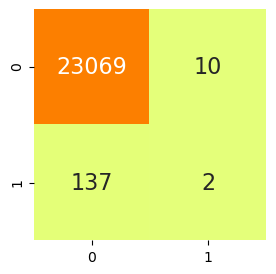

In [82]:
RF_over = RandomForestClassifier(class_weight='balanced', random_state=42)
%time RF_over.fit(X_train_over, y_train_over)
RF_over_predict = RF_over.predict(X_test)
print(classification_report(y_test, RF_over_predict))
plt.figure(figsize=(3, 3))
sn.heatmap(confusion_matrix(y_test,RF_over_predict), cbar=False, annot=True, cmap='Wistia', fmt ='d',annot_kws={"size": 16})

In [74]:
#SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
print(X_train_smt.shape)
print(y_train_smt.shape)
print(np.unique(y_train_smt, return_counts=True))

(138470, 13)
(138470,)
(array([0, 1], dtype=int64), array([69235, 69235], dtype=int64))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     23079
           1       0.12      0.29      0.17       139

    accuracy                           0.98     23218
   macro avg       0.56      0.64      0.58     23218
weighted avg       0.99      0.98      0.99     23218



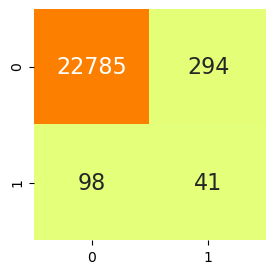

In [79]:
RF_smt = RandomForestClassifier(class_weight='balanced', random_state=42)
%time RF_smt.fit(X_train_smt, y_train_smt)
RF_smt_predict = RF_smt.predict(X_test)
print(classification_report(y_test, RF_smt_predict))
plt.figure(figsize=(3, 3))
sn.heatmap(confusion_matrix(y_test,RF_smt_predict), cbar=False, annot=True, cmap='Wistia', fmt ='d',annot_kws={"size": 16})

In [28]:
def plot_roc(clf, Xf_test, Yf_test, name, ax, show_thresholds=False):
    Yf_pred_rf = clf.predict_proba(Xf_test)[:, 1]
    fpr, tpr, thr = roc_curve(Yf_test, Yf_pred_rf)
    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);
    
    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14,
            horizontalalignment='left', verticalalignment='top', color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));
            ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

## Under-Sampling Imbalanced Date

In [35]:
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler,RandomOverSampler

In [41]:
X = bk_data.drop('BK', axis=1)
y = bk_data['BK']

X_train, X_test, y_train,  y_test = train_test_split(X, y, random_state=42)

In [42]:
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X_train, y_train)# new class distribution
print(np.unique(y_rus, return_counts=True))

(array([0, 1], dtype=int64), array([419, 419], dtype=int64))


In [43]:
print(np.unique(y_train, return_counts=True))

(array([0, 1], dtype=int64), array([69235,   419], dtype=int64))


In [44]:
#Random Forest
RF = RandomForestClassifier(class_weight='balanced', random_state=42)
%time RF.fit(X_rus, y_rus)
RF_predict = RF.predict(X_test)
print(classification_report(y_test, RF_predict))

Wall time: 248 ms
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     23079
           1       0.03      0.87      0.06       139

    accuracy                           0.83     23218
   macro avg       0.51      0.85      0.48     23218
weighted avg       0.99      0.83      0.90     23218



# Combining Both Random Sampling Techniques

In [45]:
# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, y)
print(np.unique(y_over, return_counts=True))

(array([0, 1], dtype=int64), array([92314, 46157], dtype=int64))


In [46]:
# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(np.unique(y_combined_sampling, return_counts=True))

(array([0, 1], dtype=int64), array([57696, 46157], dtype=int64))


In [52]:
#Random Forest
RF_over_under = RandomForestClassifier(class_weight='balanced', random_state=42)
%time RF_over_under.fit(X_combined_sampling, y_combined_sampling)
RF_predict = RF_over_under.predict(X_test)
print(classification_report(y_test, RF_predict))

Wall time: 14.2 s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23079
           1       0.93      1.00      0.97       139

    accuracy                           1.00     23218
   macro avg       0.97      1.00      0.98     23218
weighted avg       1.00      1.00      1.00     23218



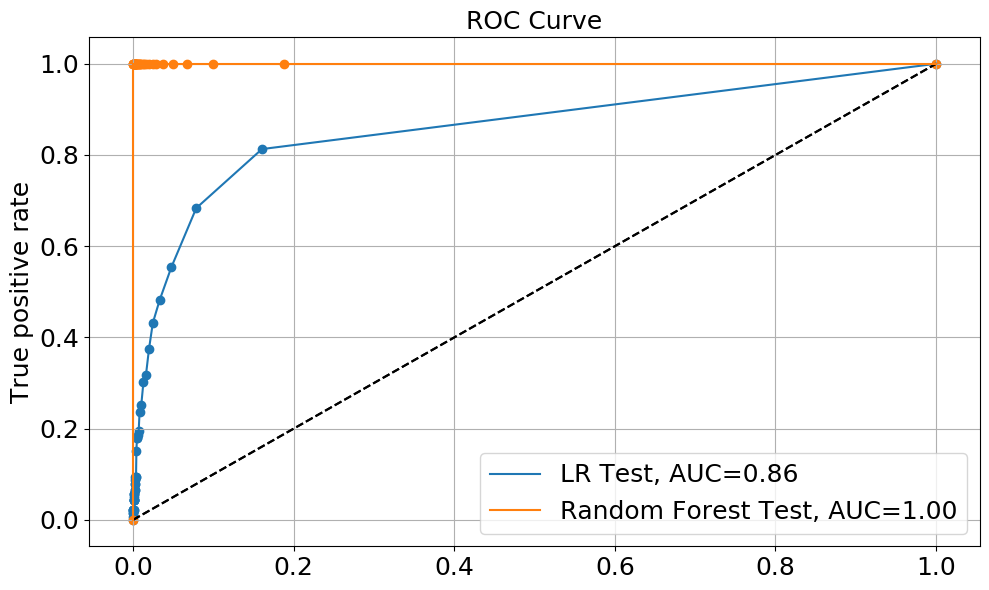

In [56]:
# Print Comparative ROC Curves for Each Model (Training)w/ AUC Score
from sklearn.metrics import roc_curve, auc, confusion_matrix
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(RF, X_test, y_test, "LR Test", ax)
# plot_roc(LR_predict, X_test, y_test, "LR Test", ax)
plot_roc(RF_over_under, X_test, y_test, "Random Forest Test", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();